In [1]:
import QUANTAXIS as QA
import sys



In [2]:
Account=QA.QA_Account(allow_sellopen=True,allow_t0=True,account_cookie='future_test',market_type=QA.MARKET_TYPE.FUTURE_CN)

In [3]:
Broker=QA.QA_BacktestBroker()

前期货数据暂未存储,直接获取来回测

In [4]:
rb_ds=QA.QA_fetch_future_day_adv('RBL8','2017-01-01','2018-08-28')

In [5]:
rb_ds

< QA_DataStruct_Future_day with 1 securities >

In [6]:
Account.market_type

'future_cn'

In [7]:
import numpy as np
import pandas as pd
def MACD_JCSC(dataframe,SHORT=12,LONG=26,M=9):
    """
    1.DIF向上突破DEA，买入信号参考。
    2.DIF向下跌破DEA，卖出信号参考。
    """
    CLOSE=dataframe.close
    DIFF =QA.EMA(CLOSE,SHORT) - QA.EMA(CLOSE,LONG)
    DEA = QA.EMA(DIFF,M)
    MACD =2*(DIFF-DEA)

    CROSS_JC=QA.CROSS(DIFF,DEA)
    CROSS_SC=QA.CROSS(DEA,DIFF)
    ZERO=0
    return pd.DataFrame({'DIFF':DIFF,'DEA':DEA,'MACD':MACD,'CROSS_JC':CROSS_JC,'CROSS_SC':CROSS_SC,'ZERO':ZERO})

ind=rb_ds.add_func(MACD_JCSC)


In [8]:

for items in rb_ds.panel_gen:
    
    for item in items.security_gen:
        daily_ind=ind.loc[item.index]
        if daily_ind.CROSS_JC.iloc[0]>0:
            order=Account.send_order(
                code=item.code[0], 
                time=item.date[0], 
                amount=300, 
                towards=QA.ORDER_DIRECTION.BUY_OPEN, 
                price=0, 
                order_model=QA.ORDER_MODEL.CLOSE, 
                amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                )

            if order:
                print(order)
                print(item)
                Broker.receive_order(QA.QA_Event(order=order,market_data=item))


                trade_mes=Broker.query_orders(Account.account_cookie,'filled')
                res=trade_mes.loc[order.account_cookie,order.realorder_id]
                order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
        elif daily_ind.CROSS_SC.iloc[0]>0:
            if Account.sell_available.get(item.code[0], 0)>0:
                order=Account.send_order(
                    code=item.code[0], 
                    time=item.date[0], 
                    amount=Account.sell_available.get(item.code[0], 0), 
                    towards=QA.ORDER_DIRECTION.SELL_CLOSE, 
                    price=0, 
                    order_model=QA.ORDER_MODEL.MARKET, 
                    amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                    )
                if order:
                    Broker.receive_order(QA.QA_Event(order=order,market_data=item))


                    trade_mes=Broker.query_orders(Account.account_cookie,'filled')
                    res=trade_mes.loc[order.account_cookie,order.realorder_id]
                    order.trade(res.trade_id,res.trade_price,res.trade_amount,res.trade_time)
    Account.settle()
            

< QA_Order realorder_id Order_RIOlwfW9 datetime:2017-03-16 00:00:00 code:RBL8 amount:300 price:0 towards:2 btype:future_cn order_id:Order_RIOlwfW9 account:future_test status:queued >
< QA_DataStruct_Future_day with 1 securities >
receive deal
1000000
NOT ENOUGH MONEY FOR Order_RIOlwfW9
< QA_Order realorder_id Order_N7kgLDdi datetime:2017-04-24 00:00:00 code:RBL8 amount:300 price:0 towards:2 btype:future_cn order_id:Order_N7kgLDdi account:future_test status:queued >
< QA_DataStruct_Future_day with 1 securities >
receive deal
receive deal
< QA_Order realorder_id Order_To0LnZ6R datetime:2017-06-16 00:00:00 code:RBL8 amount:300 price:0 towards:2 btype:future_cn order_id:Order_To0LnZ6R account:future_test status:queued >
< QA_DataStruct_Future_day with 1 securities >
receive deal
receive deal
< QA_Order realorder_id Order_B5y7xKVo datetime:2017-08-02 00:00:00 code:RBL8 amount:300 price:0 towards:2 btype:future_cn order_id:Order_B5y7xKVo account:future_test status:queued >
< QA_DataStruct_Fu

In [9]:
Account.history_table

,datetime,code,price,amount,cash,order_id,realorder_id,trade_id,account_cookie,commission,tax,message
0,2017-04-24 00:00:00,RBL8,2927.0,300,1.216805e+05,Order_N7kgLDdi,Order_N7kgLDdi,Trade_DaIBoUOA,future_test,219.5250,0,None
1,2017-06-02 00:00:00,RBL8,3064.5,-300,1.040801e+06,Order_xW3kadRP,Order_xW3kadRP,Trade_GvHDboia,future_test,229.8375,0,None
2,2017-06-16 00:00:00,RBL8,3091.0,300,1.132688e+05,Order_To0LnZ6R,Order_To0LnZ6R,Trade_E1KSoZ3M,future_test,231.8250,0,None
3,2017-07-21 00:00:00,RBL8,3507.0,-300,1.165106e+06,Order_bpRNei6j,Order_bpRNei6j,Trade_pUkThqHy,future_test,263.0250,0,None
4,2017-08-02 00:00:00,RBL8,3725.0,300,4.732641e+04,Order_B5y7xKVo,Order_B5y7xKVo,Trade_EmQkM2GF,future_test,279.3750,0,None
5,2017-08-14 00:00:00,RBL8,3840.0,-300,1.199038e+06,Order_mXTz7ReE,Order_mXTz7ReE,Trade_fMagl9ej,future_test,288.0000,0,None
6,2017-10-13 00:00:00,RBL8,3815.0,300,5.425229e+04,Order_zd4AiEsW,Order_zd4AiEsW,Trade_6Dw0JClT,future_test,286.1250,0,None
7,2017-10-27 00:00:00,RBL8,3615.0,-300,1.138481e+06,Order_qAVNipPz,Order_qAVNipPz,Trade_9z1H8cDP,future_test,271.1250,0,None
8,2017-11-06 00:00:00,RBL8,3736.0,300,1.740096e+04,Order_4FNMg93m,Order_4FNMg93m,Trade_jxanJK9R,future_test,280.2000,0,None
9,2017-12-11 00:00:00,RBL8,3919.5,-300,1.192957e+06,Order_5pJGeLfD,Order_5pJGeLfD,Trade_1ZR5G0Yu,future_test,293.9625,0,None


In [19]:
Account.frozen

{'RBL8': {2: {'money': 0, 'amount': 0}, -2: {'money': 0, 'amount': 0}}}

In [16]:
Risk=QA.QA_Risk(Account,if_fq=False,market_data=rb_ds)

In [17]:
Risk.account.cash

[1000000,
 121680.47499999998,
 1040800.6375,
 113268.8125,
 1165105.7875,
 47326.41250000009,
 1199038.4125,
 54252.28750000009,
 1138481.1625,
 17400.96250000014,
 1192957.0000000002,
 41269.15000000014,
 1185033.1375000002,
 27043.71250000014,
 1206798.7000000002,
 180842.27500000014,
 1265521.0375,
 156443.83750000014,
 1298108.35,
 139218.7000000002,
 1447041.6625]

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

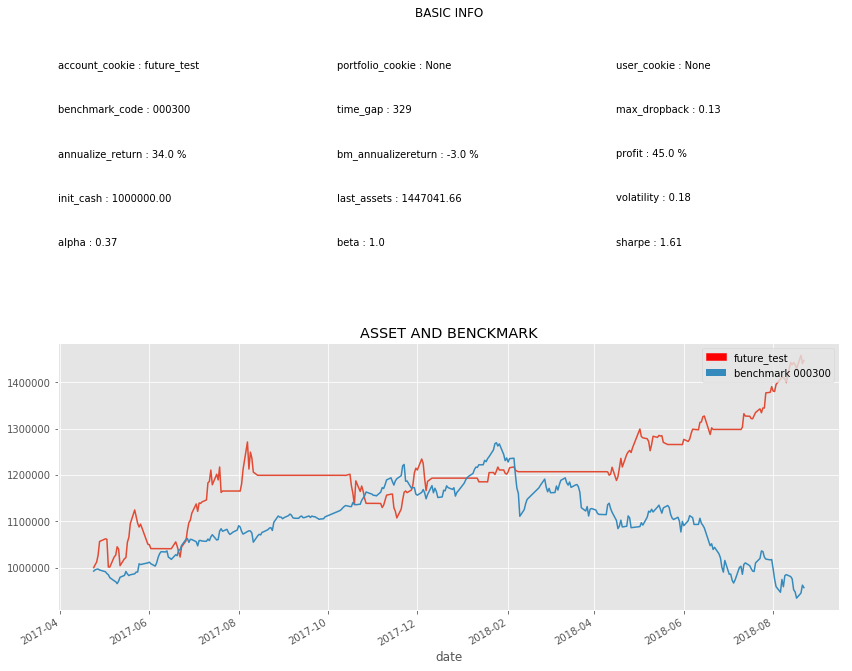

In [18]:
Risk.plot_assets_curve()

In [13]:
Risk.profit_construct

{'total_buyandsell': 452550.0,
 'total_tax': 0.0,
 'total_commission': -5508.34,
 'total_profit': 447041.66}

In [14]:
#Risk=QA.QA_Risk(Account)